# Qualitative comparison of the elemental abundance ratios of the bar, inner disc, and knot given the GMM fit in L

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from astropy.io import fits
import tqdm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import nmmn.plots
import vorbin
wolfram=nmmn.plots.wolframcmap() # for Mathematica's cmap
parula=nmmn.plots.parulacmap() # for MATLAB's cmap
turbo=nmmn.plots.turbocmap() # Turbo
import warnings
warnings.filterwarnings('ignore')

In [2]:
# LOAD THE DATA
# this is the latest APOGEE catalogue that APW sent me with orbital properties determined using StarHorse distances
path = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/bar-prob.fits'
tb = fits.open(path)
data = tb[1].data 


In [43]:
mask_knot = data['Knot Probability']>0.9
mask_bar = data['Bar Probability']>0.9
mask_disc = data['Disc Probability']>0.9

In [11]:
path = '/Users/dhortadarrington/Documents/Projects/mw-bar/plots/mw-projection.tiff'
img = plt.imread(path)

In [18]:
x = data['X']*8.178
y = data['Y']*8.178

In [44]:
test_x = -x[mask_knot]+8
test_y = y[mask_knot]

data_test = np.array([test_x,test_y])
print(type(data_test))

<class 'numpy.ndarray'>


In [45]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data_test)
nbins=20
xi, yi = np.mgrid[test_x.min():test_x.max():nbins*1j, test_y.min():test_y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))


In [46]:
test_x2 = -x[mask_bar]+8
test_y2 = y[mask_bar]

data_test2 = np.array([test_x2,test_y2])
print(type(data_test2))

<class 'numpy.ndarray'>


In [47]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data_test2)
nbins=20
xi2, yi2 = np.mgrid[test_x2.min():test_x2.max():nbins*1j, test_y2.min():test_y2.max():nbins*1j]
zi2 = k(np.vstack([xi2.flatten(), yi2.flatten()]))


In [48]:
import seaborn as sns
import matplotlib.colors as cols
from matplotlib.colors import LogNorm

In [49]:
def alpha_cmap(cmap):
    my_cmap = cmap(np.arange(cmap.N))
    # Set a square root alpha.
    x = np.linspace(0, 1, cmap.N)
    my_cmap[:,-1] = x ** (0.5)
    my_cmap = cols.ListedColormap(my_cmap)

    return my_cmap

Text(10, 1, 'Sun')

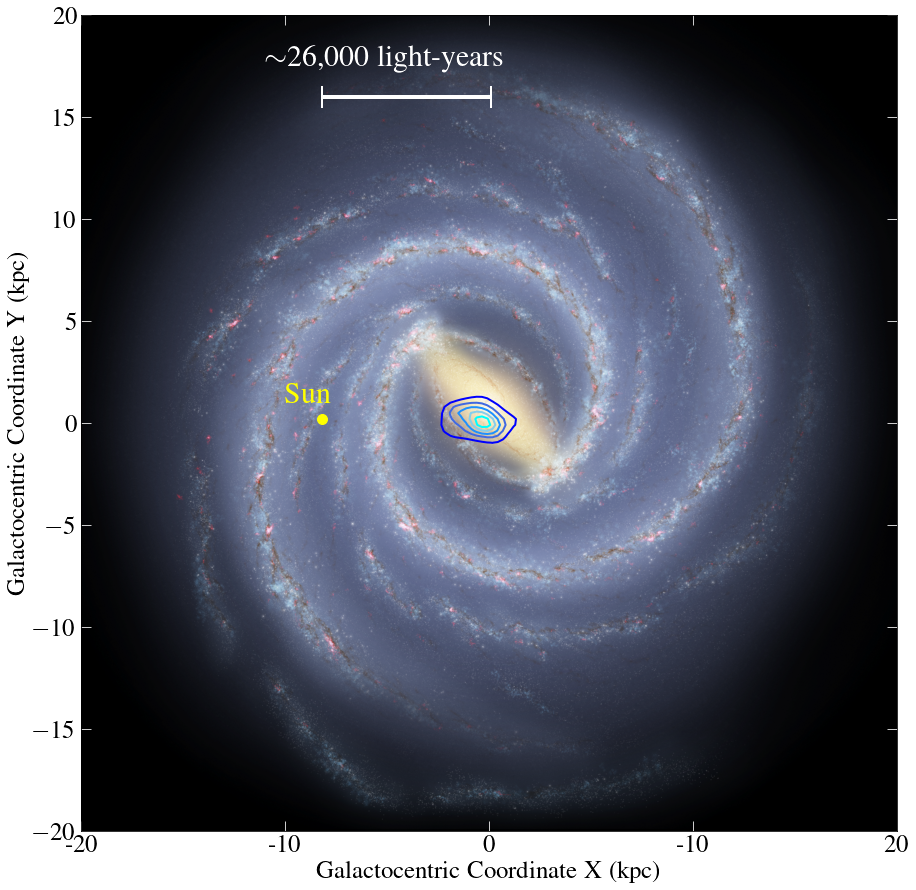

In [52]:
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']

plt.figure(figsize=(15,15))
plt.imshow(img,extent=(20,-20,-20,20))

# plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap='Reds',norm=LogNorm())
plt.contour(xi, yi, zi.reshape(xi.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi2, yi2, zi2.reshape(xi2.shape),levels=6,colors=colores2,linewidths=2)
# plt.contourf(xi, yi, zi.reshape(xi.shape),levels=6,colors=colores,linewidths=2)
# plt.hexbin(test_x,test_y, bins=10,gridsize=10,cmap='Blues',mincnt=2)

plt.plot([8.125,0],[16,16],color='white',lw=4)
plt.plot([8.2,8.2],[15.5,16.5],color='white',lw=2)
plt.plot([-0.1,-0.1],[15.5,16.5],color='white',lw=2)
plt.scatter(8.178,0.2,s=100,c='yellow',marker='o')
positions = (20,10,0,-10,-20)
labels = ('-20','-10','0','-10','20')
plt.xticks(positions,labels)
plt.tick_params(direction='in',color='white',length=10,labelsize=25,top=True,right=True)
plt.xlabel(r'Galactocentric Coordinate X (kpc)',fontsize=25)
plt.ylabel(r'Galactocentric Coordinate Y (kpc)',fontsize=25)
# plt.text(-2,-17,r'$Gaia$/ESA/Danny Horta',fontsize=30,color='white')
plt.text(11,17.5,r'$\sim$26,000 light-years',fontsize=30,color='white')
plt.text(10,1,r'Sun',fontsize=30,color='yellow')
